# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.shape

(440, 8)

In [4]:
(44*4)/10

17.6

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


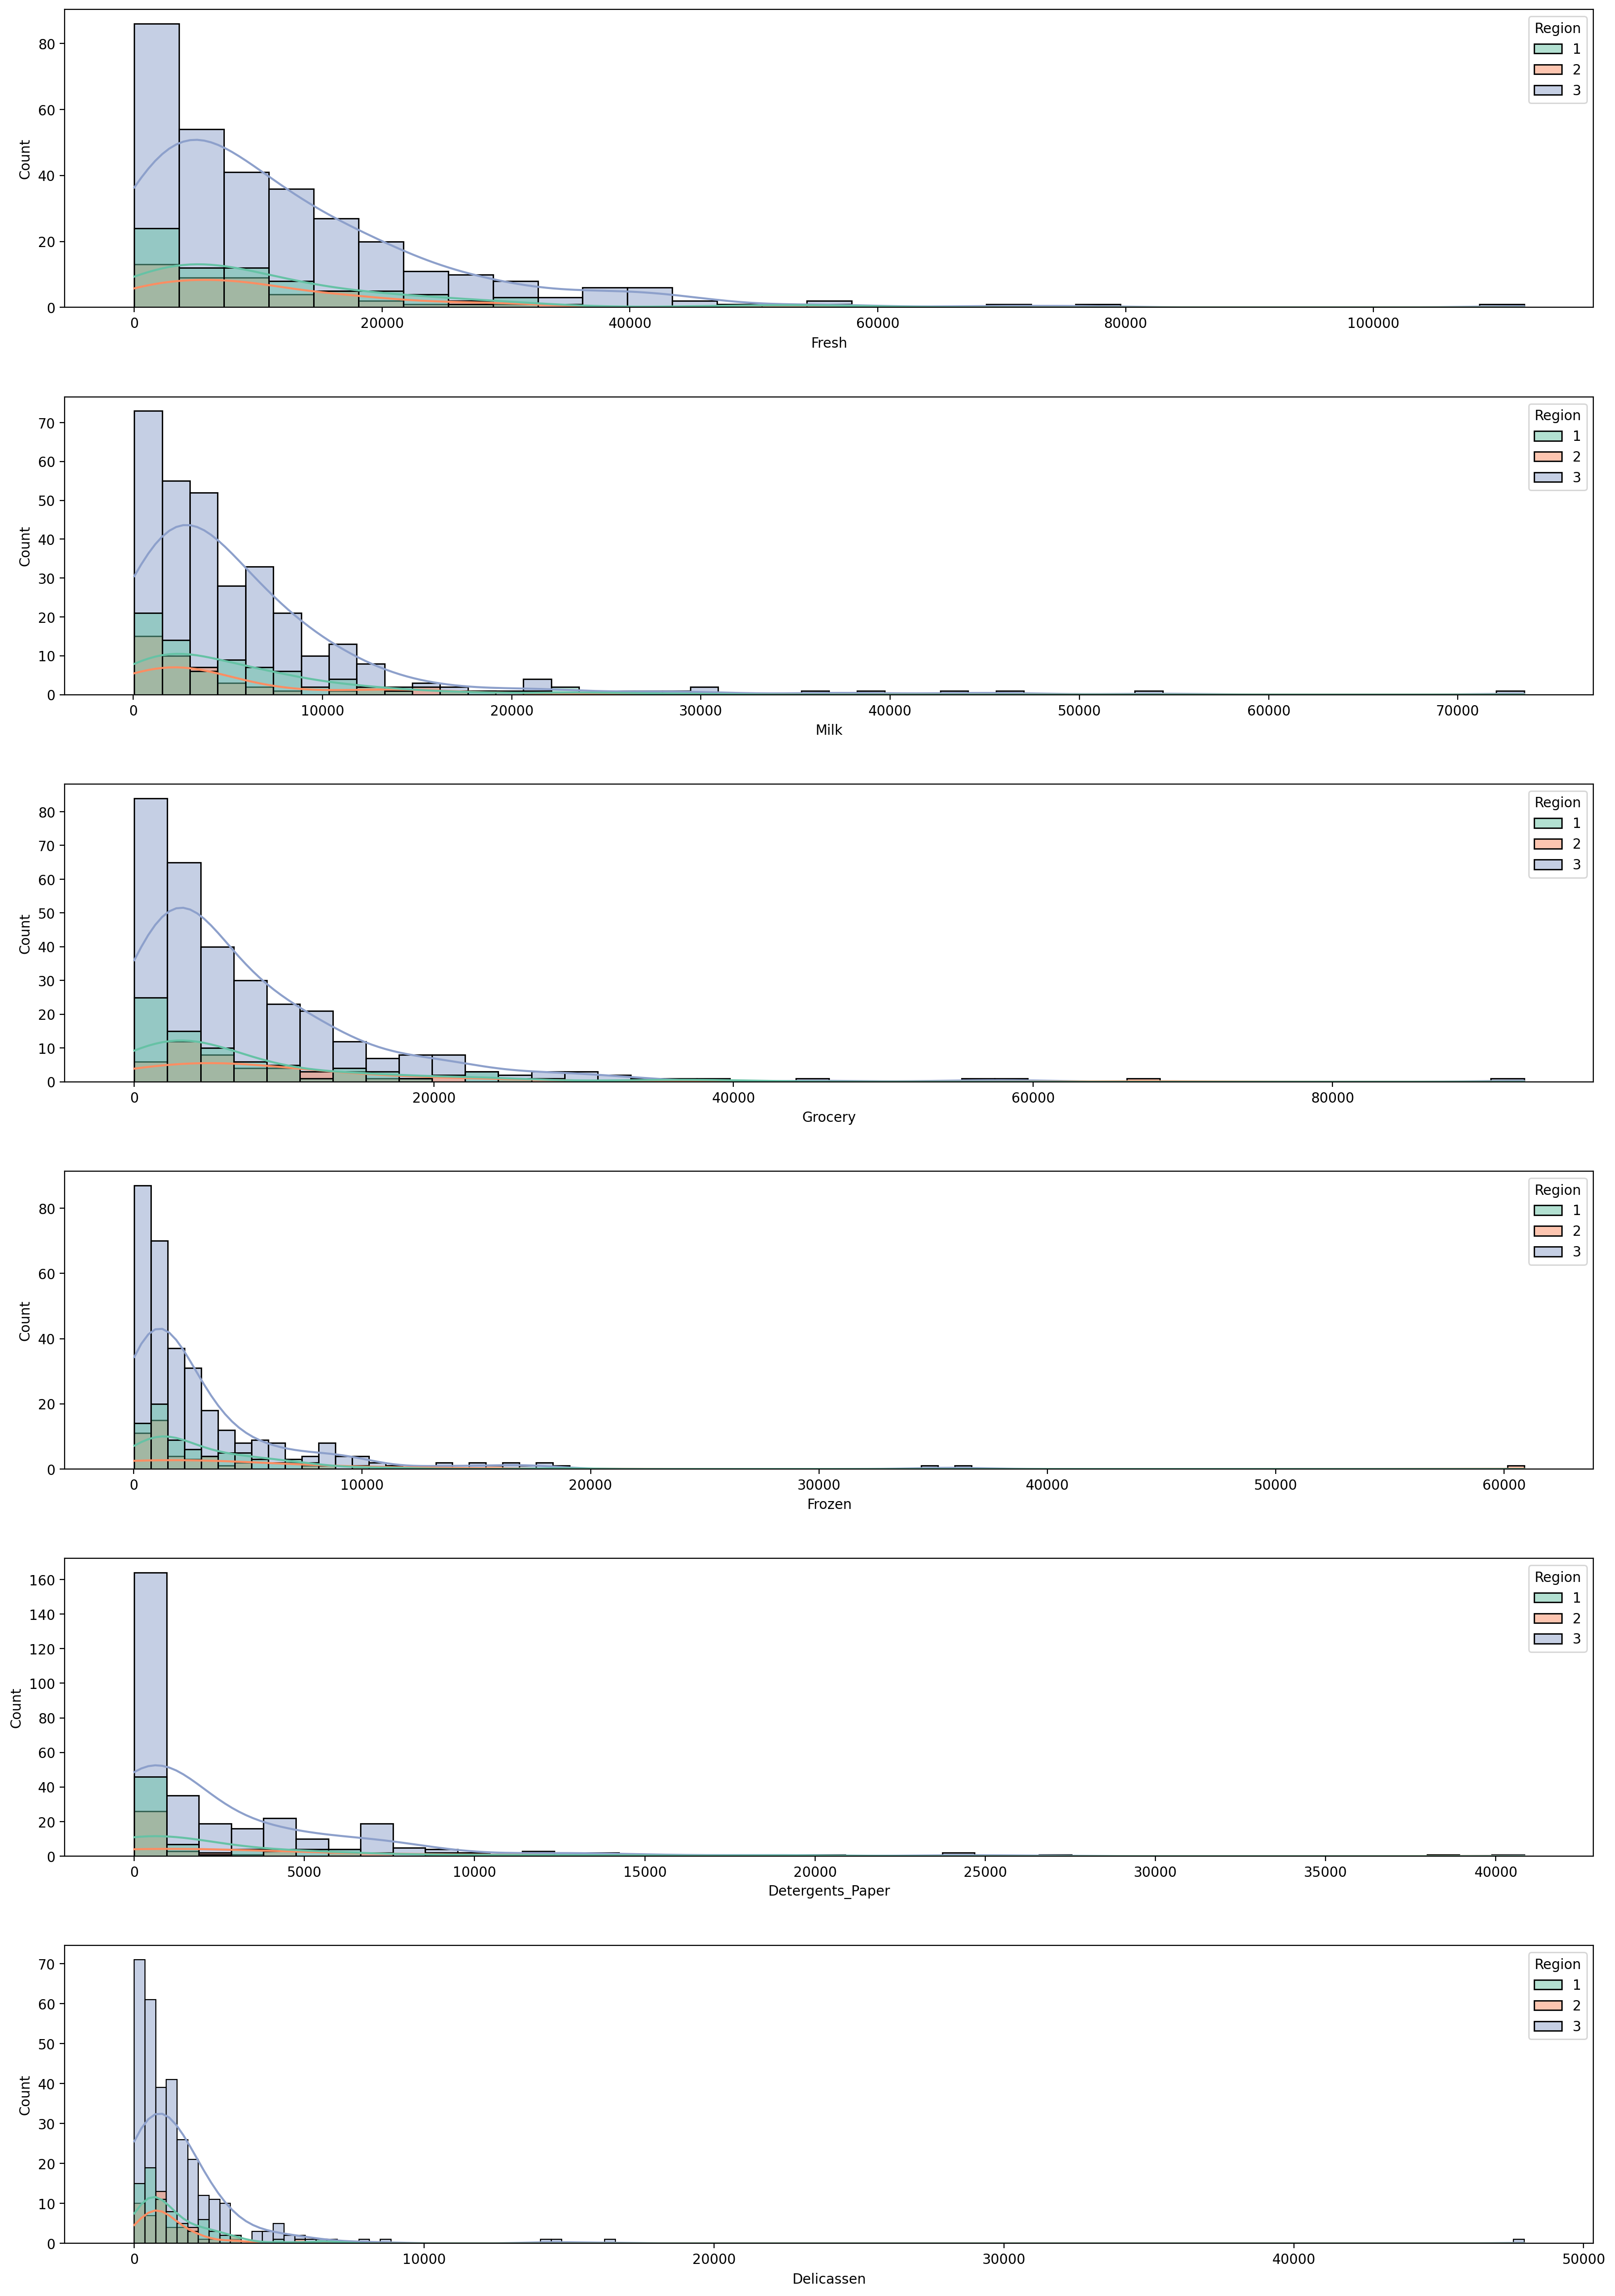

In [7]:
column = df.columns.drop(['Region','Channel'])
n=1 
fig,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30),dpi=200)
for i in column:
    plt.subplot(6,1,n)
    plt.subplots_adjust(hspace=0.3,wspace=0.5)
    sns.histplot(data=df,x=i,kde=True,palette='Set2',hue='Region')
    n+=1

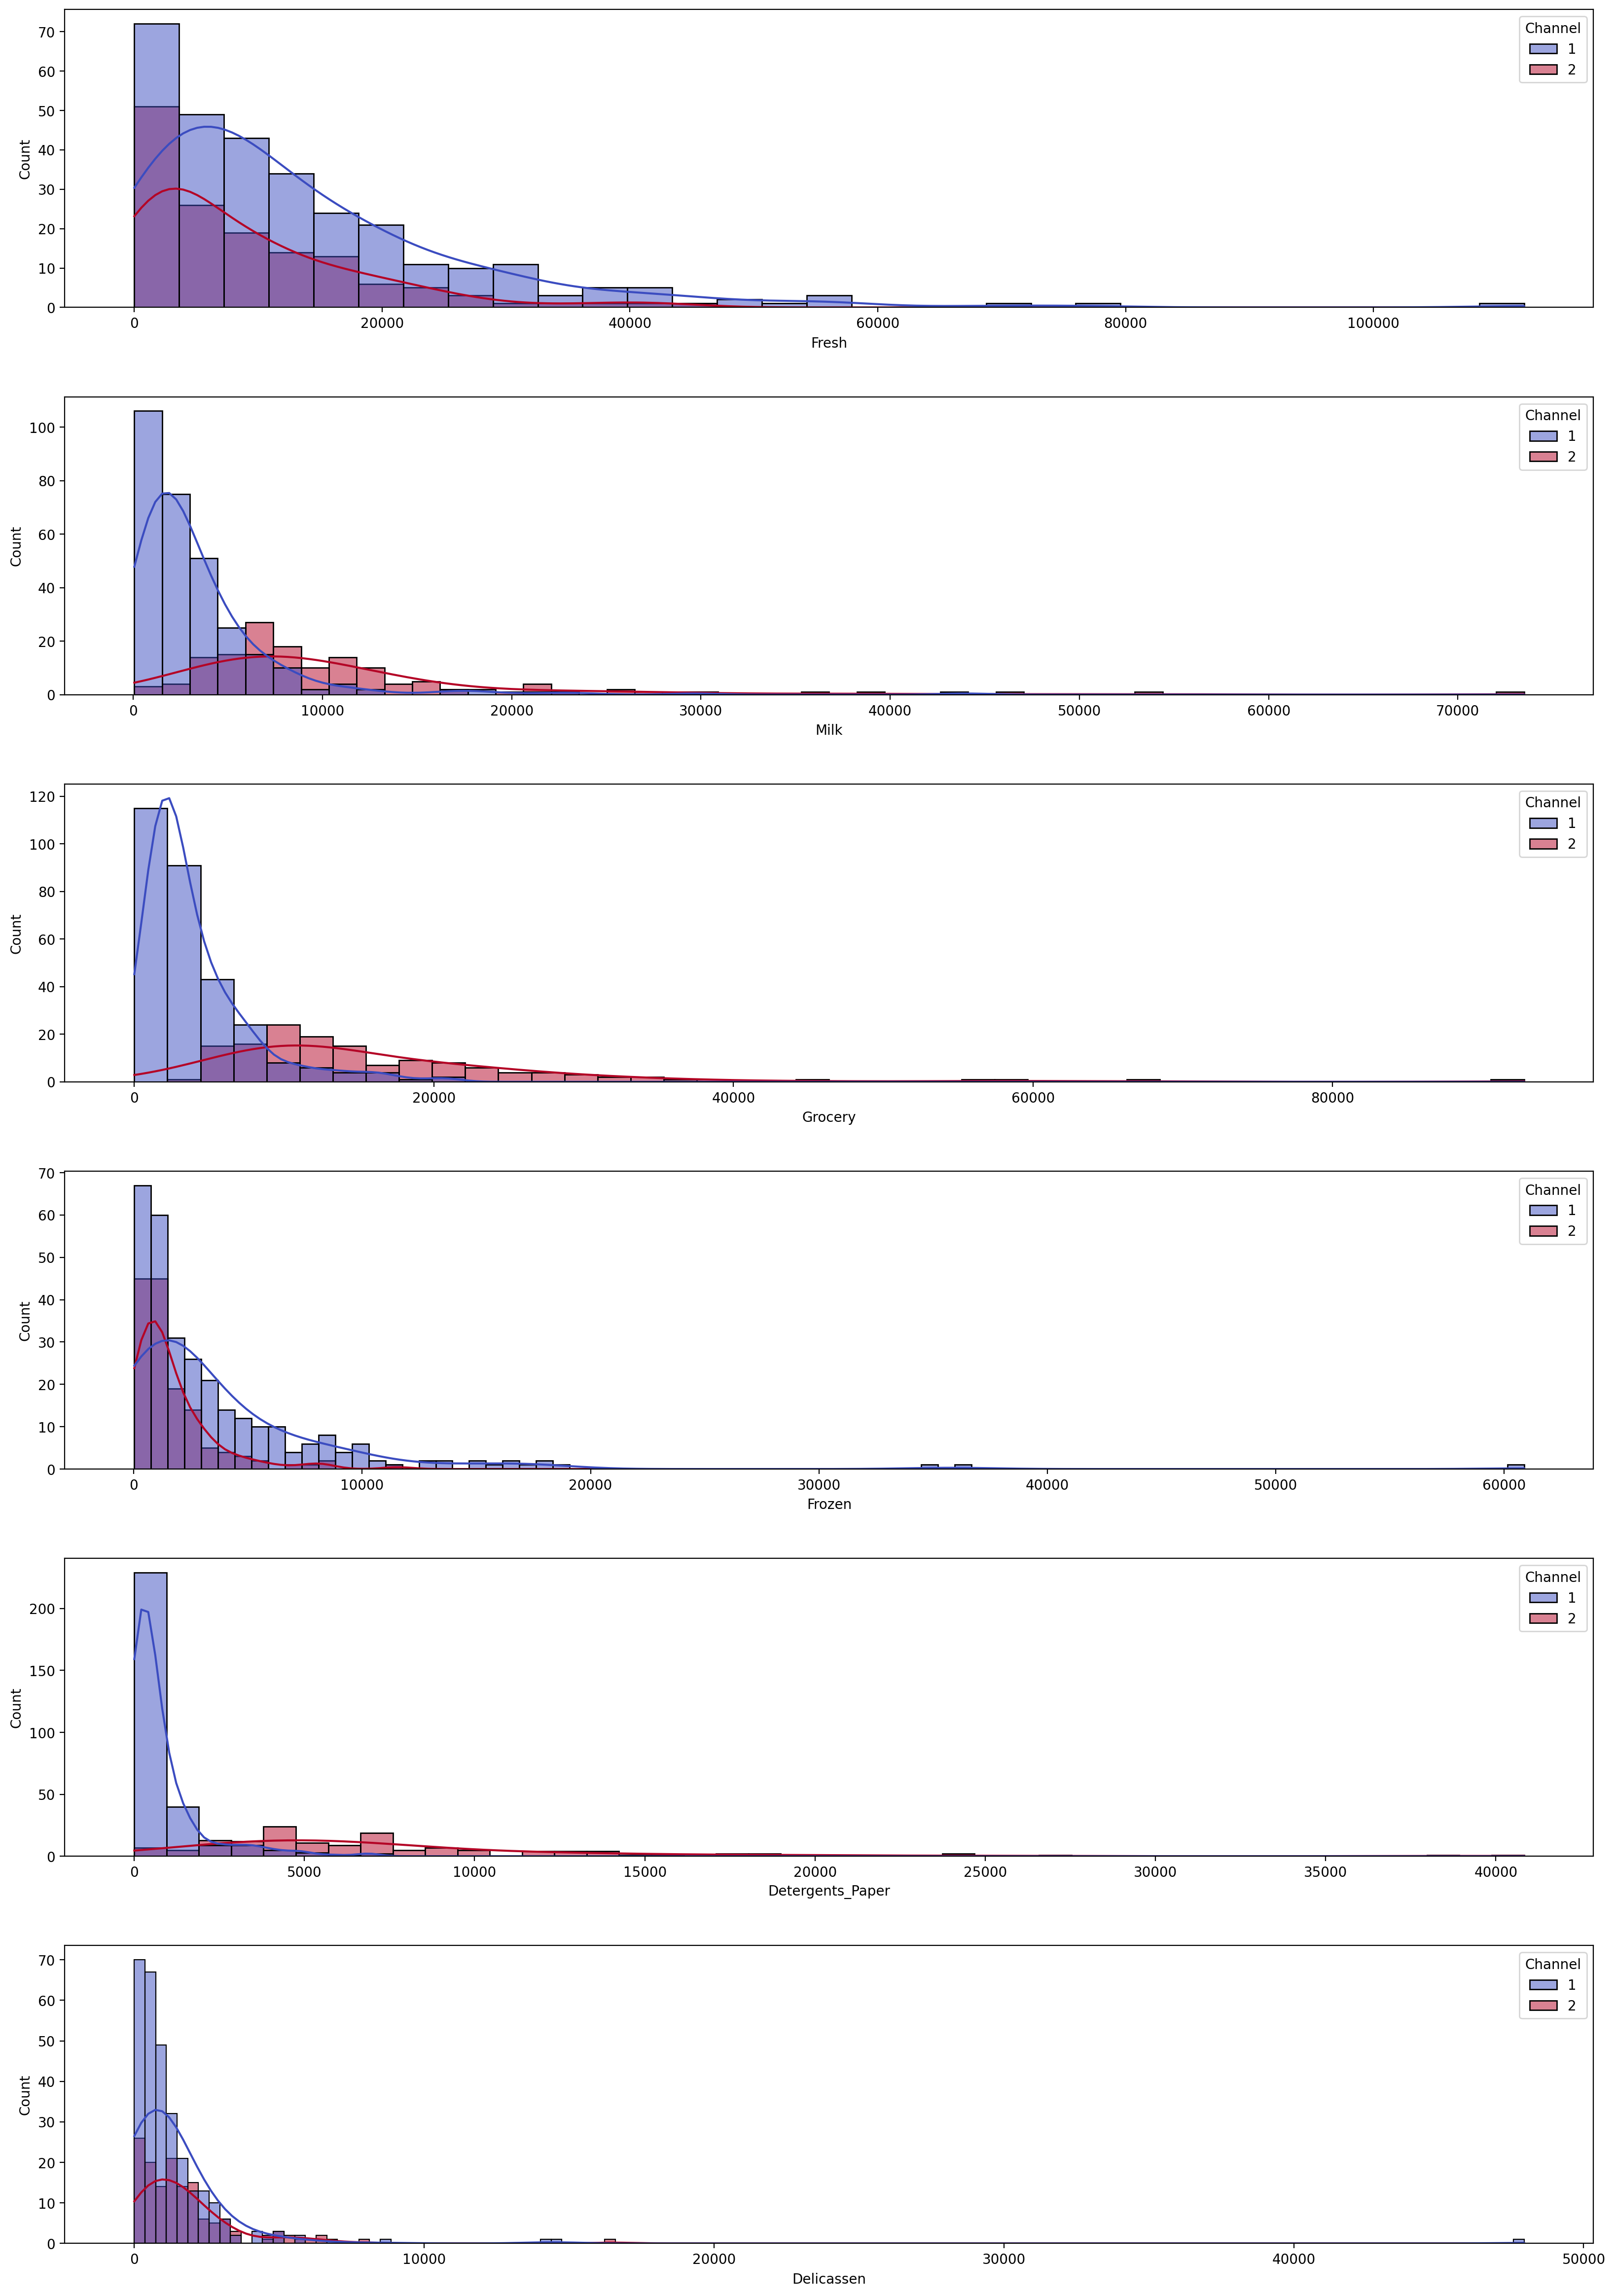

In [8]:
column = df.columns.drop(['Region','Channel'])
n=1 
fig,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30),dpi=200)
for i in column:
    plt.subplot(6,1,n)
    plt.subplots_adjust(hspace=0.3,wspace=0.5)
    sns.histplot(data=df,x=i,palette='coolwarm',hue='Channel',kde=True,fill=True)
    n+=1

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

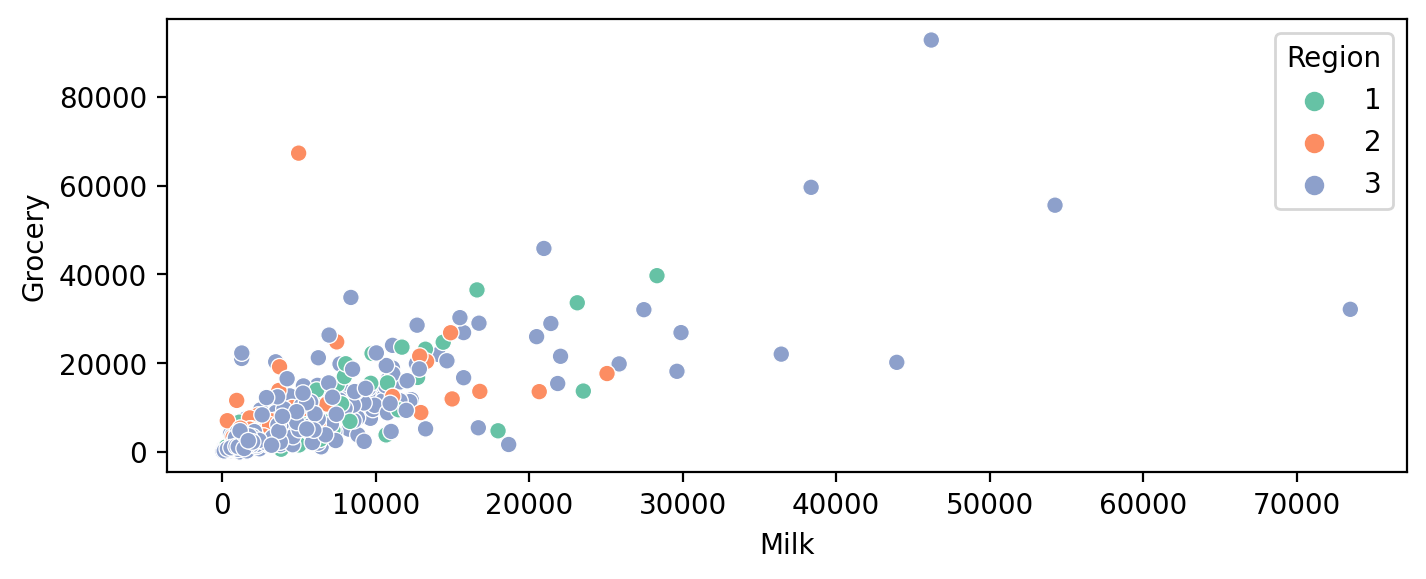

In [9]:
plt.figure(dpi=200,figsize=(8,3))
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Region',palette= 'Set2')

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

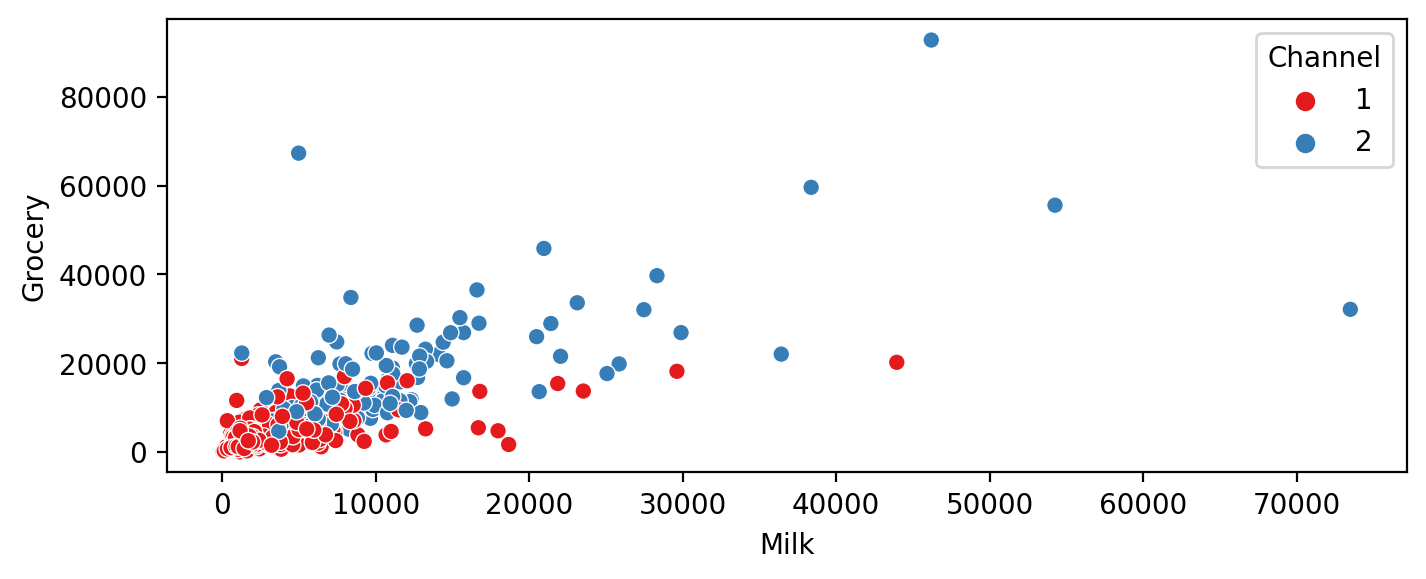

In [10]:
plt.figure(dpi=200,figsize=(8,3))
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel',palette= 'Set1')

<Figure size 3000x2000 with 0 Axes>

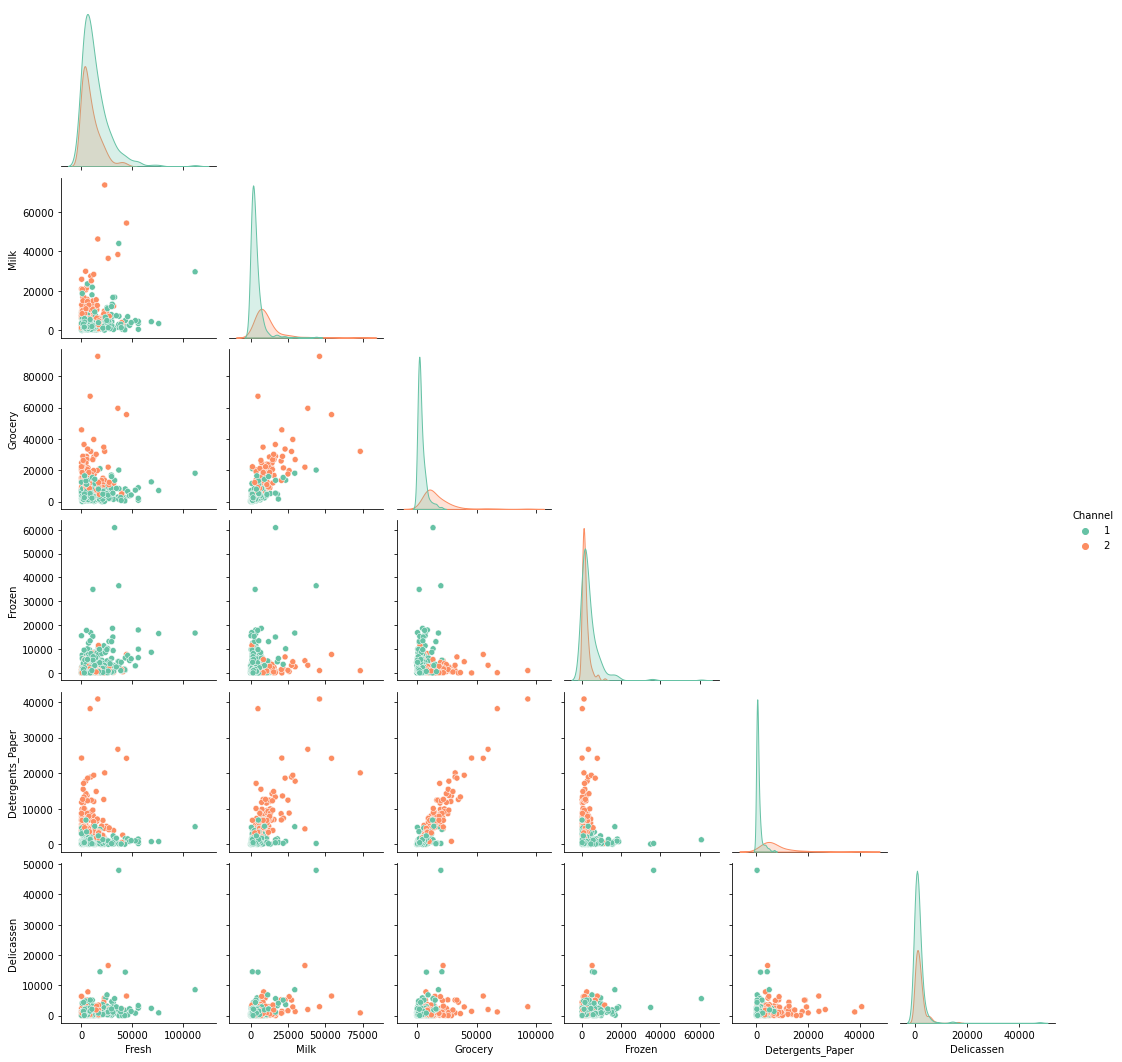

In [11]:
plt.figure(dpi=500)
sns.pairplot(data=df,x_vars=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],
            y_vars=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],
             hue='Channel',
             corner=True,palette= 'Set2');

<Figure size 3000x2000 with 0 Axes>

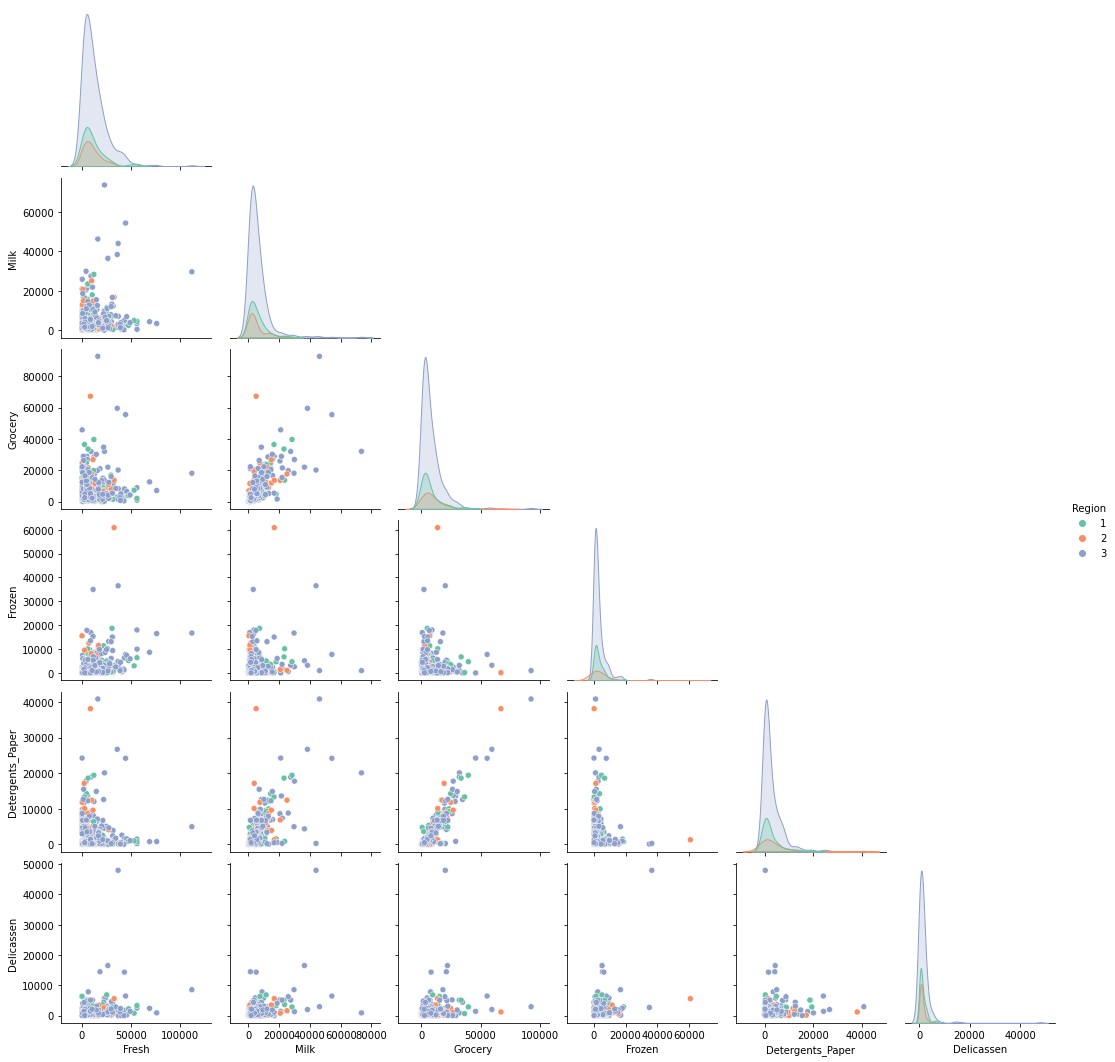

In [12]:
plt.figure(dpi=500)
sns.pairplot(data=df,x_vars=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],
            y_vars=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],
             hue='Region',
             corner=True,palette= 'Set2');

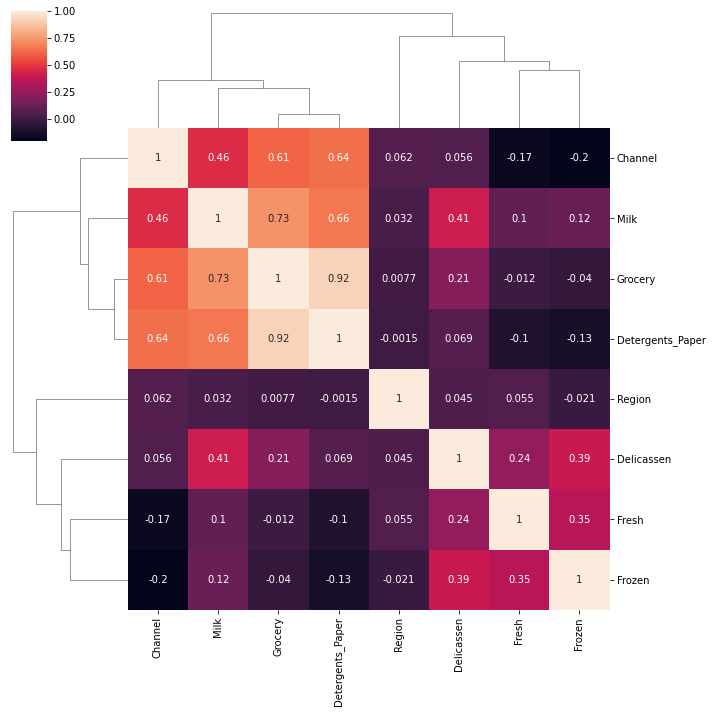

In [13]:
sns.clustermap(data=df.corr(),annot=True)

In [14]:
region= pd.DataFrame(df.groupby(['Region']).sum()).reset_index()

In [15]:
channel = pd.DataFrame(df.groupby(['Channel']).sum()).reset_index()

In [16]:
region

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,95,854833,422454,570037,231026,204136,104327
1,2,66,464721,239144,433274,190132,173311,54506
2,3,421,3960577,1888759,2495251,930492,890410,512110


In [17]:
channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,748,4015717,1028614,1180717,1116979,235587,421955
1,2,371,1264414,1521743,2317845,234671,1032270,248988


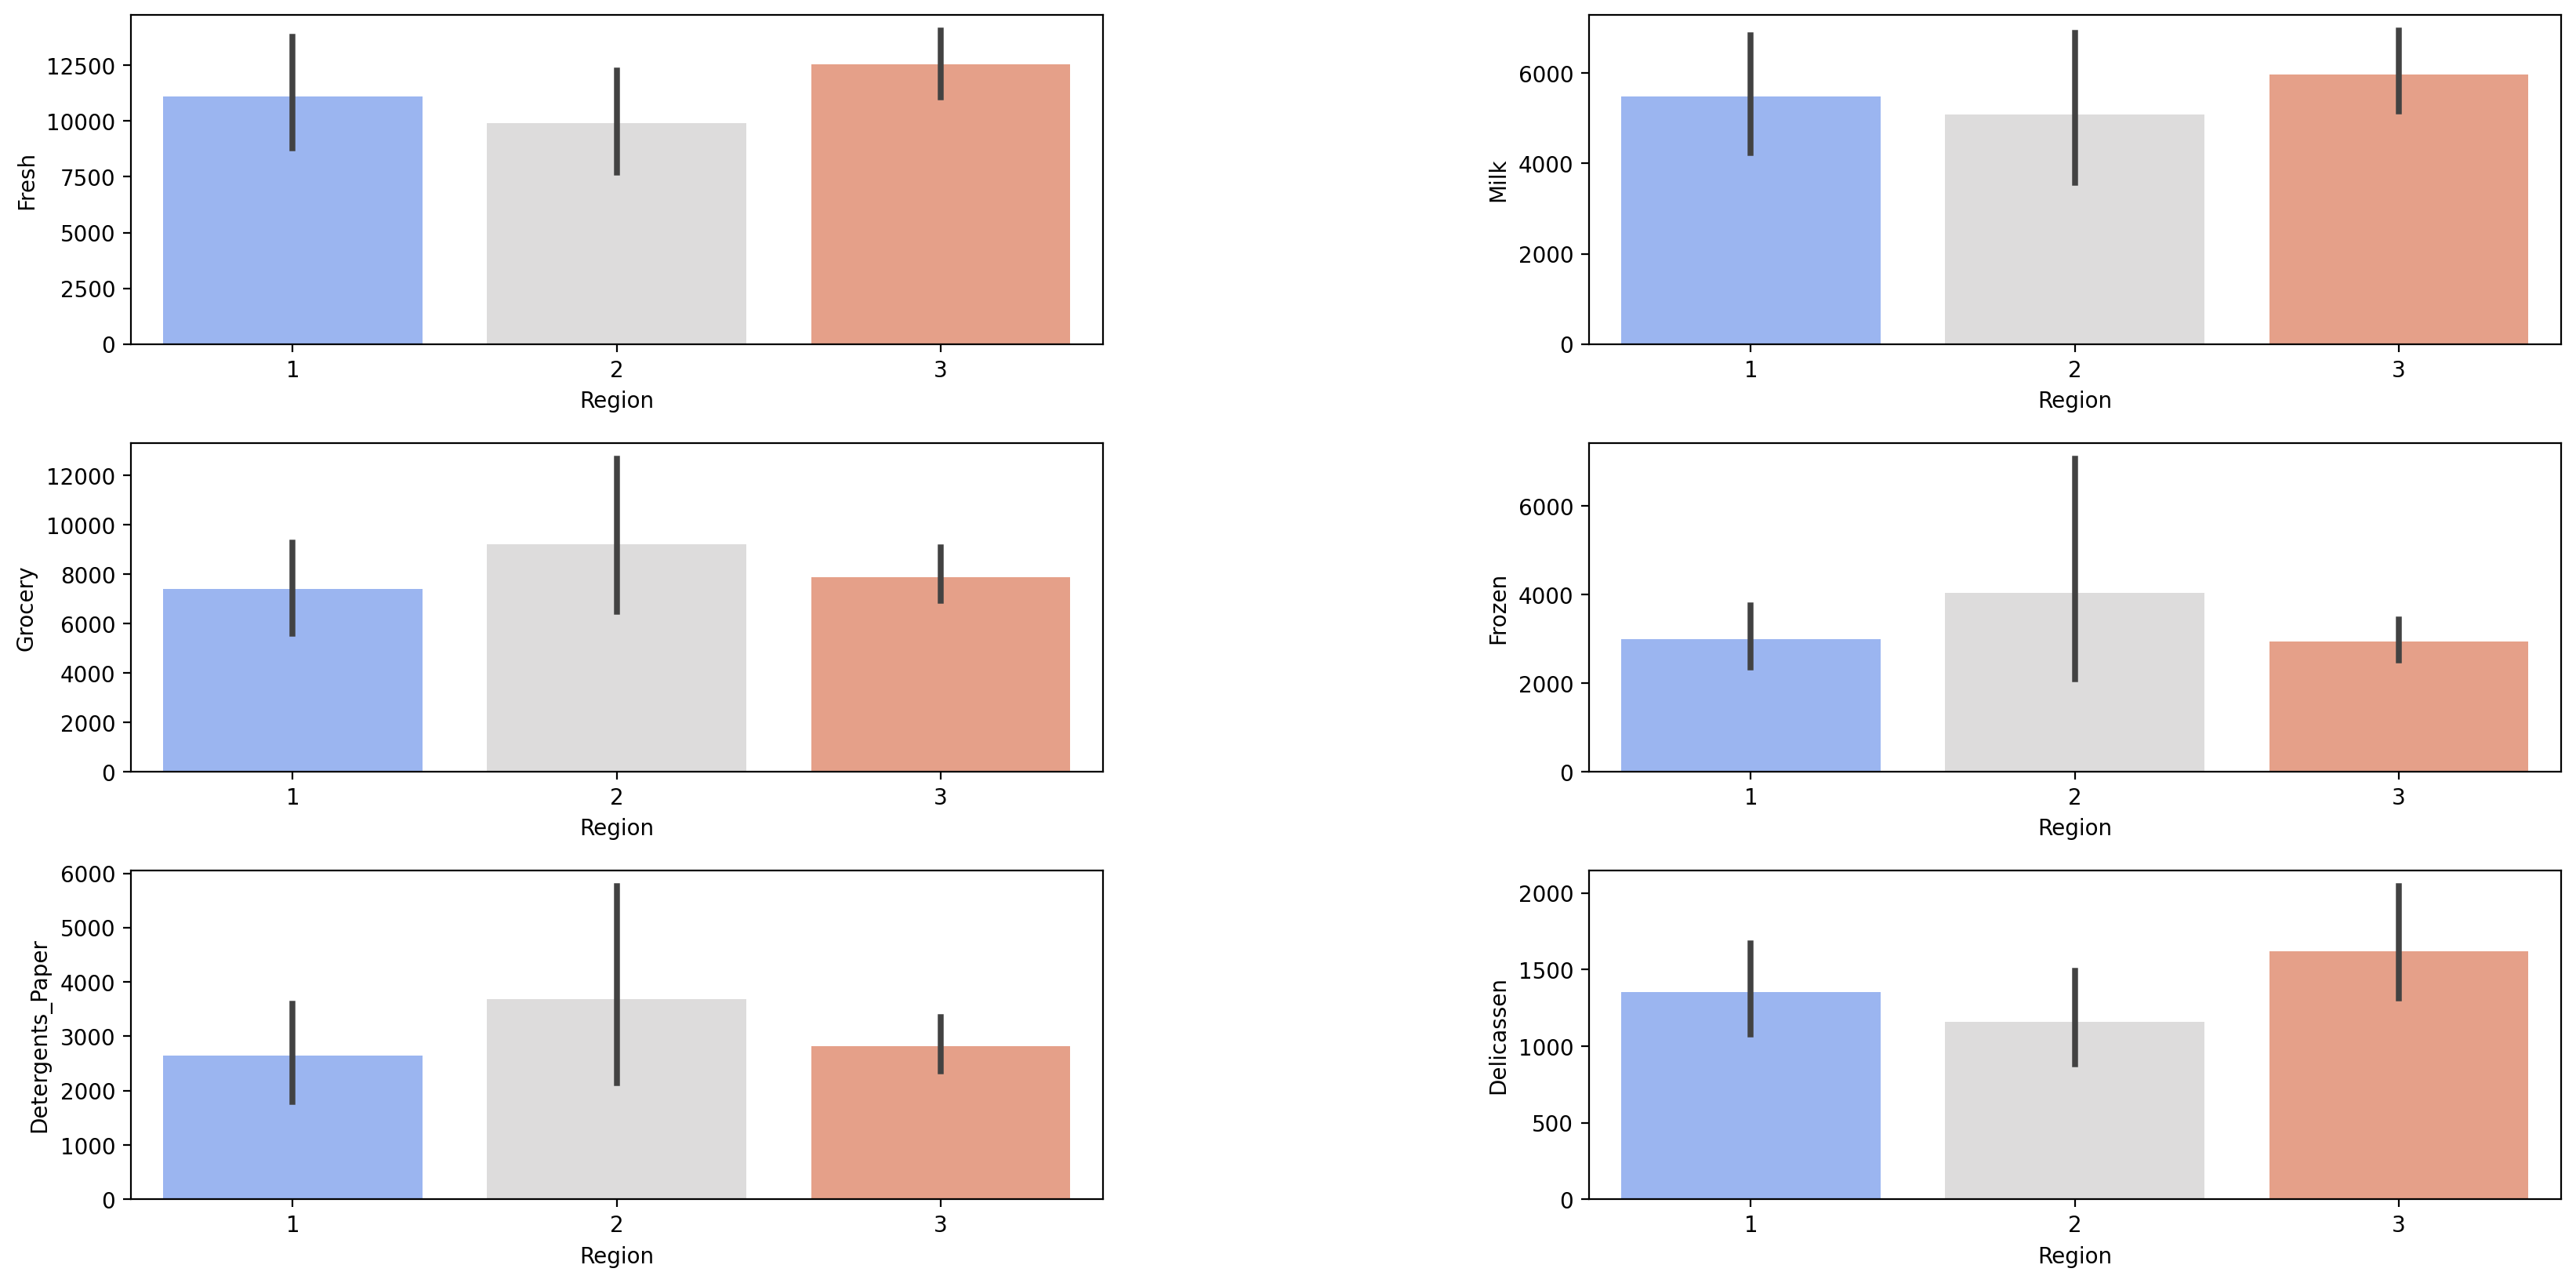

In [18]:
column = region.columns.drop(['Channel'])
n=1 
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,10),dpi=200)
for i in column:
    if i != 'Region':
        
            plt.subplot(3,2,n)
            plt.subplots_adjust(hspace=0.3,wspace=0.5)
            sns.barplot(data=df,x='Region',y=i,palette='coolwarm')
            n+=1

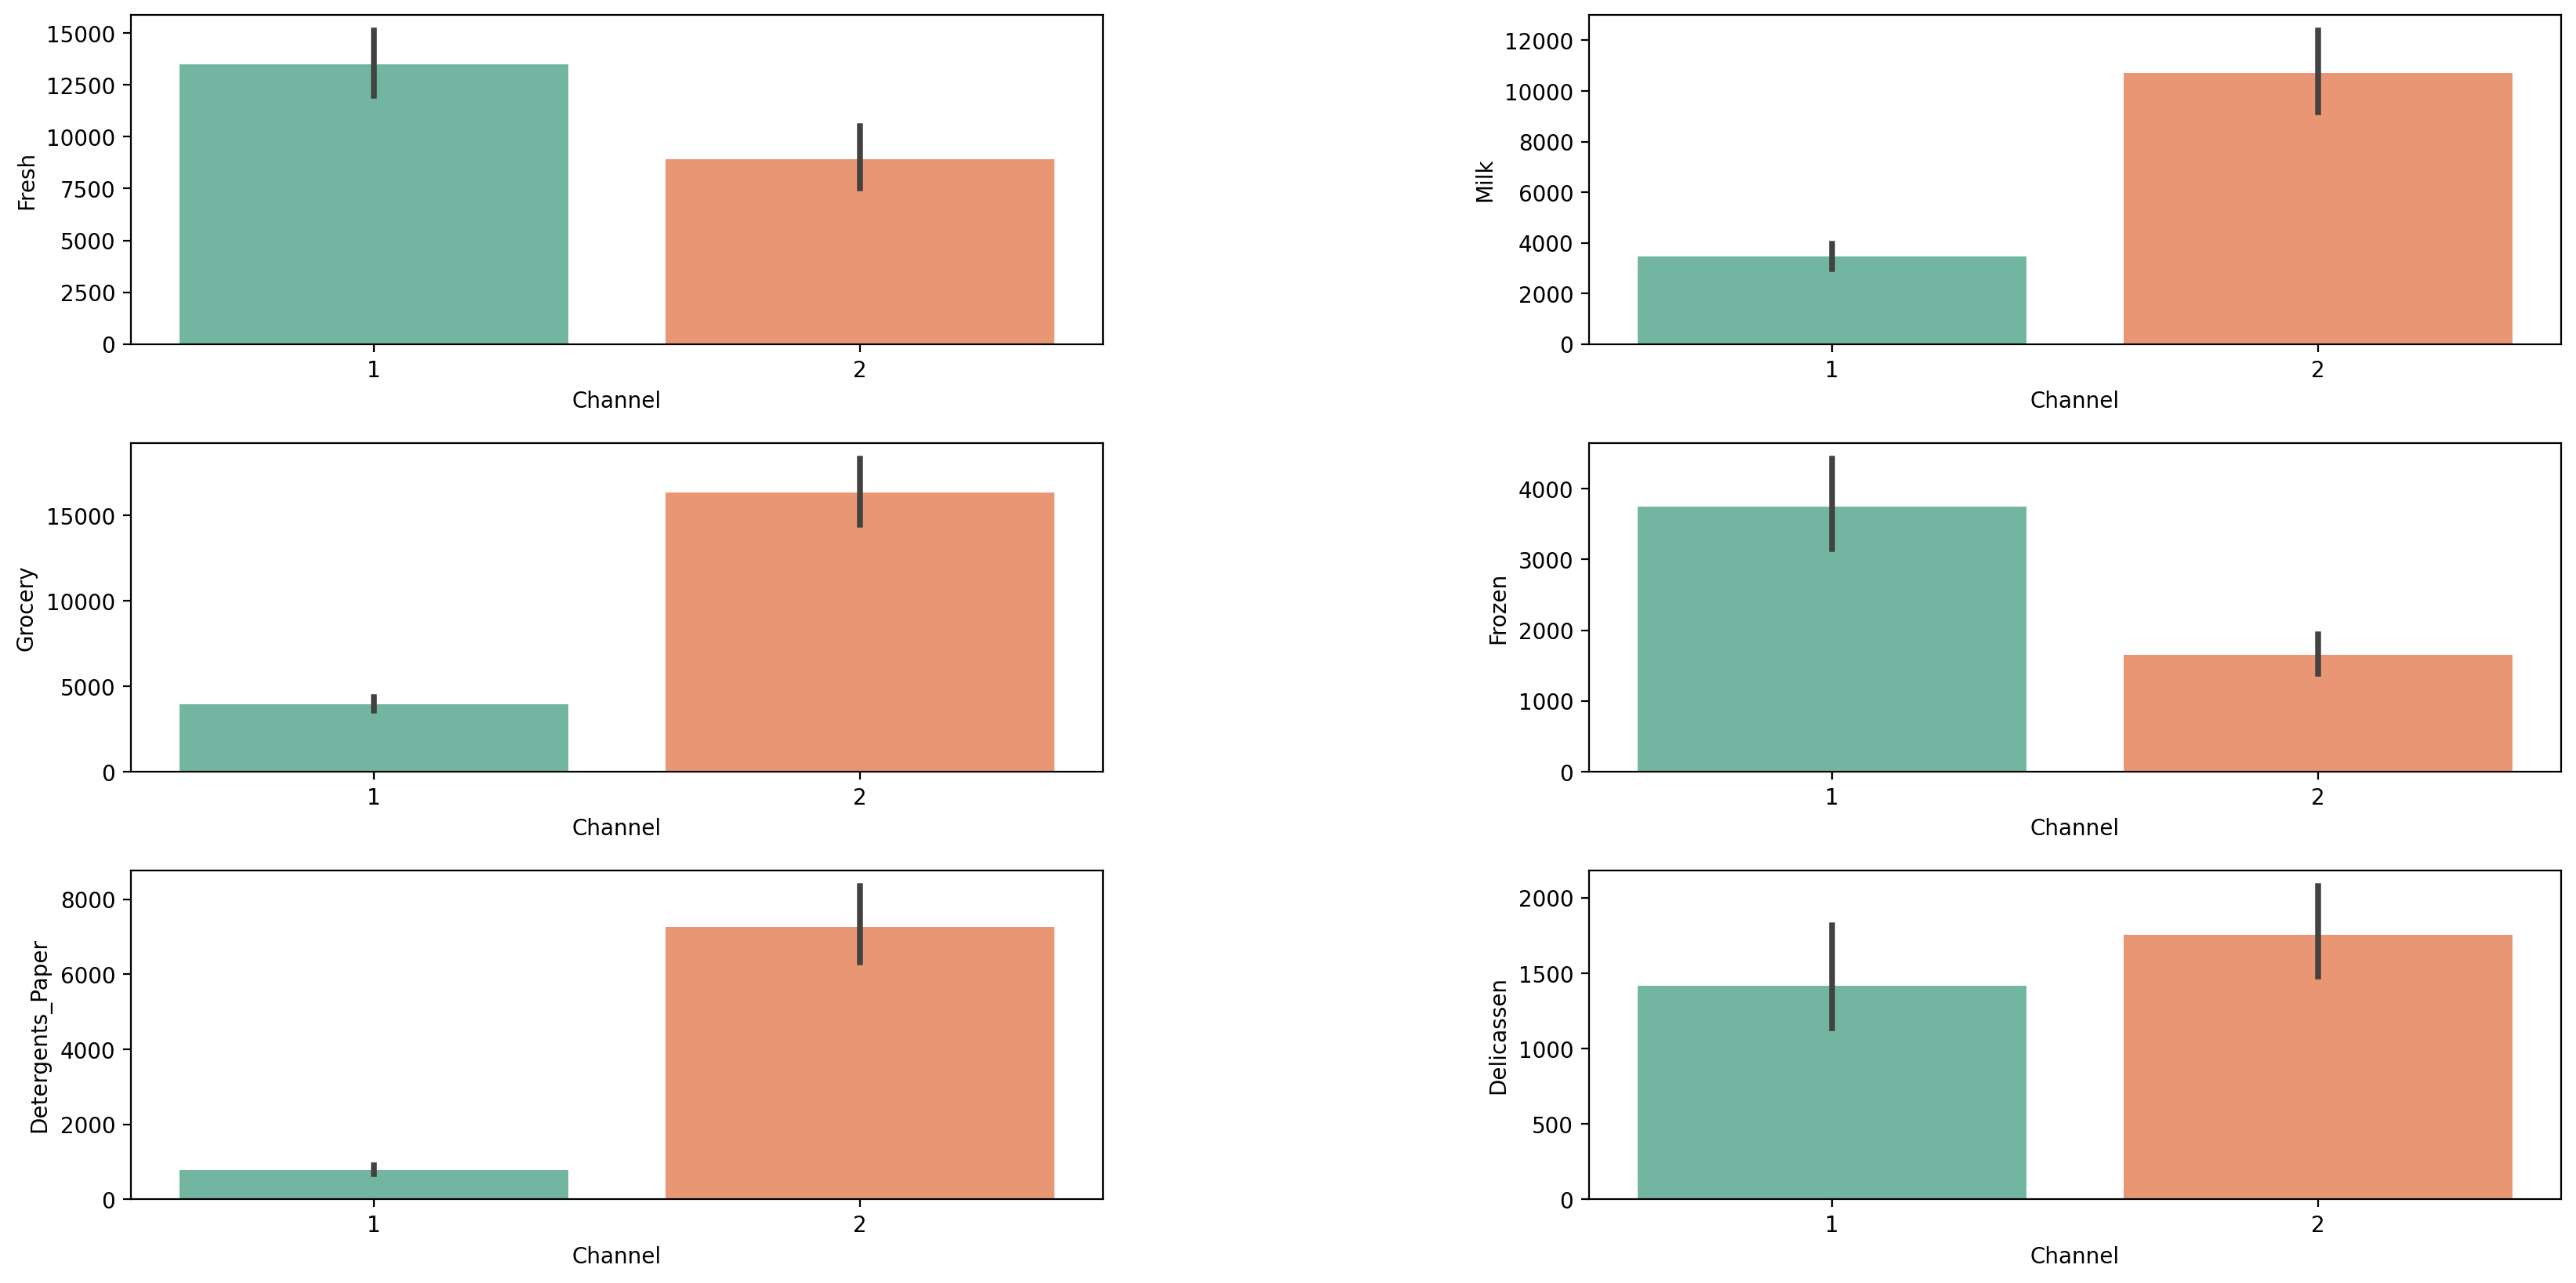

In [19]:
column = region.columns.drop(['Region'])
n=1 
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,10),dpi=200)
for i in column:
    if i != 'Channel':
        
            plt.subplot(3,2,n)
            plt.subplots_adjust(hspace=0.3,wspace=0.5)
            sns.barplot(data=df,x='Channel',y=i,palette='Set2')
            n+=1

## DBSCAN

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X =scaler.fit_transform(df)

In [21]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
outlier = []
categories = []

for eps in np.linspace(0.001,10,100):
    model = DBSCAN(eps=eps)
    model.fit(scaled_X)
    outlier.append(100*np.sum(model.labels_==-1)/len(model.labels_))
    categories.append((np.max(model.labels_)+1))
    

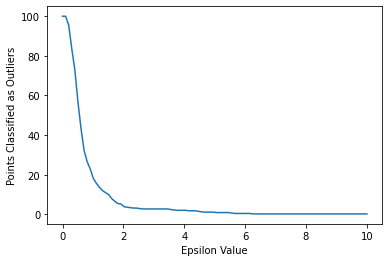

In [24]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier)
plt.ylabel("Points Classified as Outliers")
plt.xlabel("Epsilon Value");

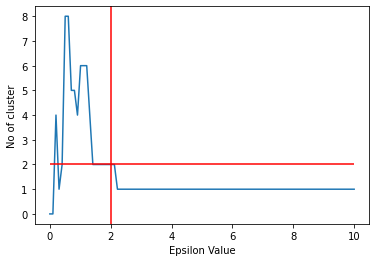

In [25]:
sns.lineplot(x=np.linspace(0.001,10,100),y=categories)
plt.ylabel("No of cluster")
plt.xlabel("Epsilon Value")
plt.axvline(x=2.0,color='red')
plt.hlines(y=2,xmax=10,xmin=0,color='red')
#plt.xlim(0,2);

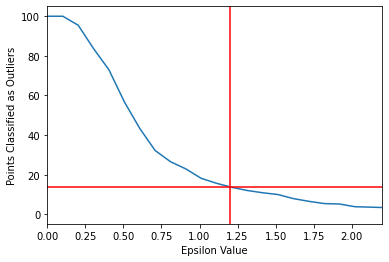

In [26]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier)
plt.ylabel("Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,2.2);
plt.axvline(x=1.20,color='red')
plt.hlines(y=14,xmax=10,xmin=0,color='red')

## DBSCAN with Chosen Epsilon


In [27]:
dbscan = DBSCAN(eps=2.0)
dbscan.fit(scaled_X)

DBSCAN(eps=2.0)

In [28]:
df['labels']= dbscan.labels_

In [29]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

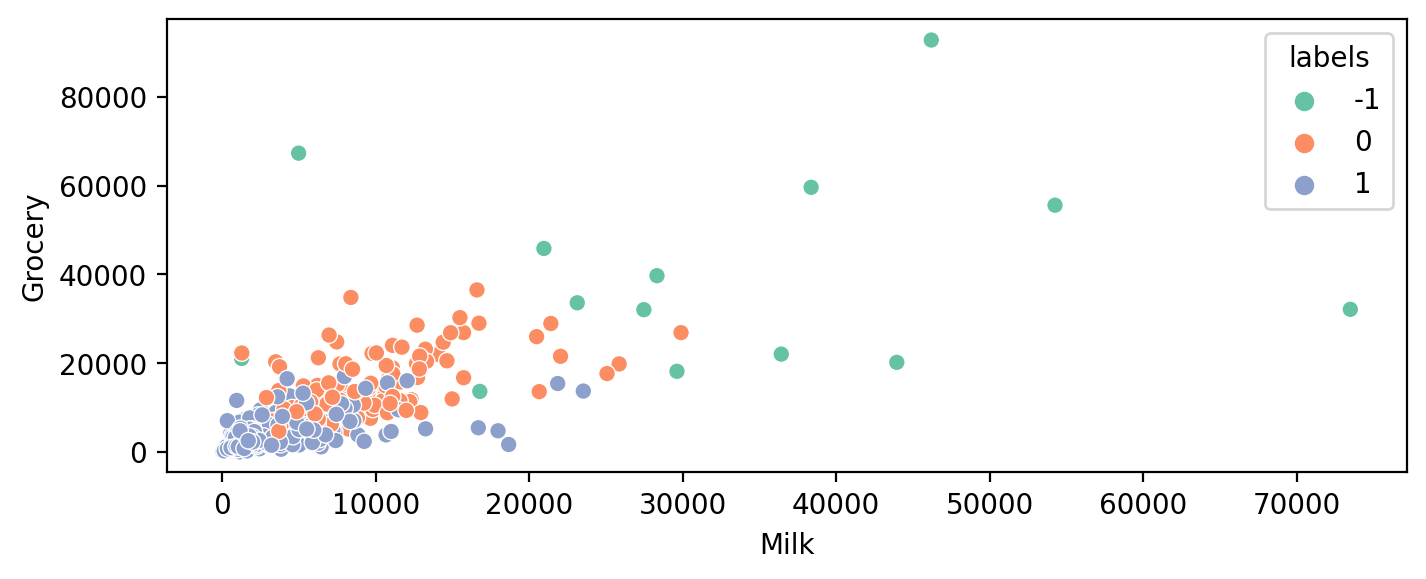

In [30]:
plt.figure(dpi=200,figsize=(8,3))
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='labels',palette= 'Set2')

<Figure size 3000x2000 with 0 Axes>

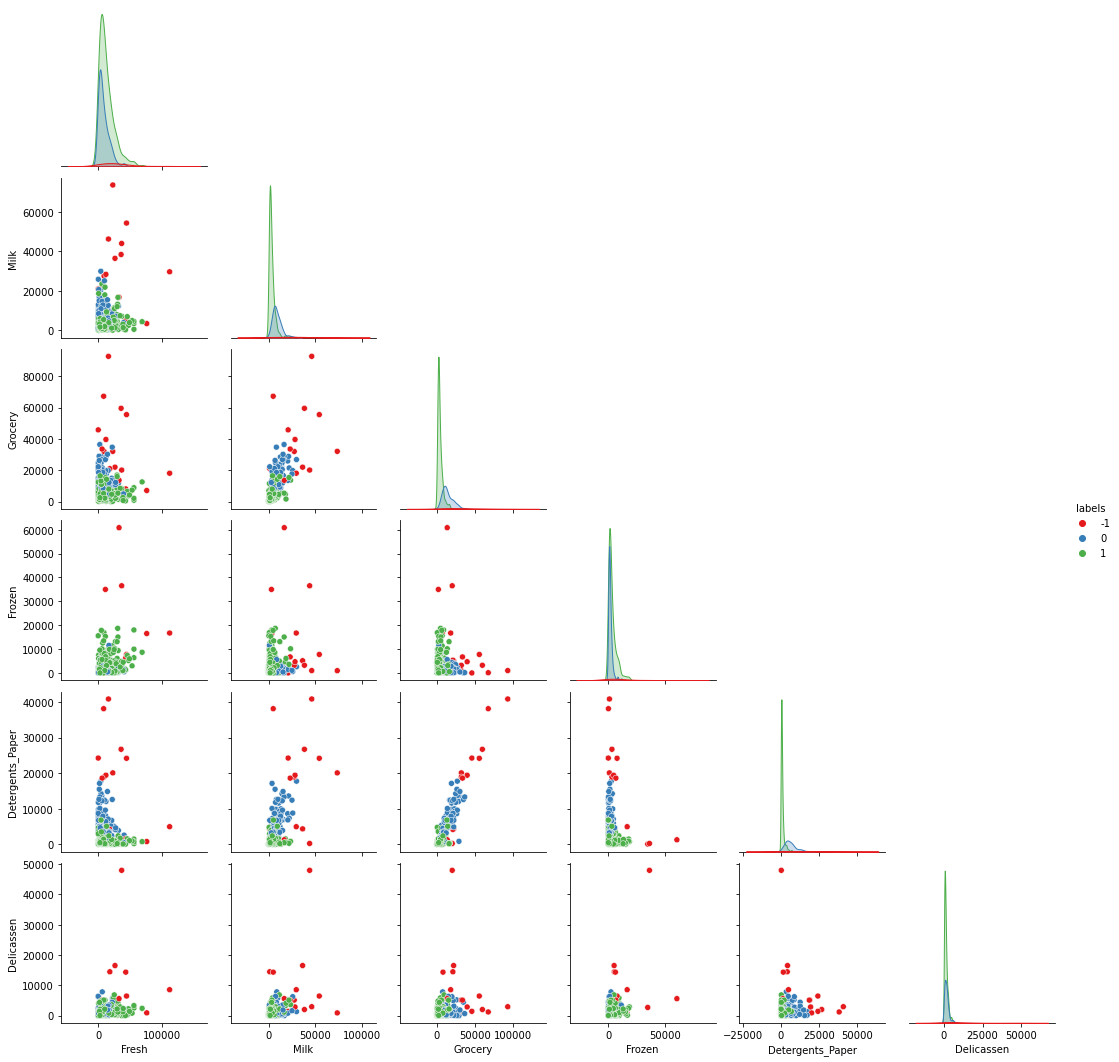

In [38]:
plt.figure(dpi=500)
sns.pairplot(data=df,x_vars=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],
            y_vars=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'],
             hue='labels',
             corner=True,palette= 'Set1');

In [32]:
cats = df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('labels').mean()

In [33]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,index=cat_means.index,columns=cat_means.columns)

In [36]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<AxesSubplot:ylabel='labels'>

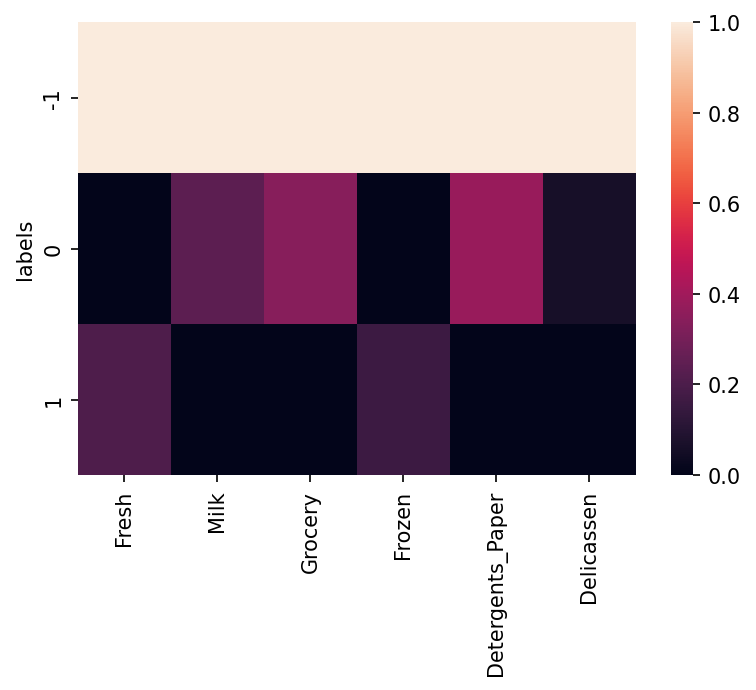

In [49]:
plt.figure(dpi=150)
sns.heatmap(data=scaled_means)

<AxesSubplot:ylabel='labels'>

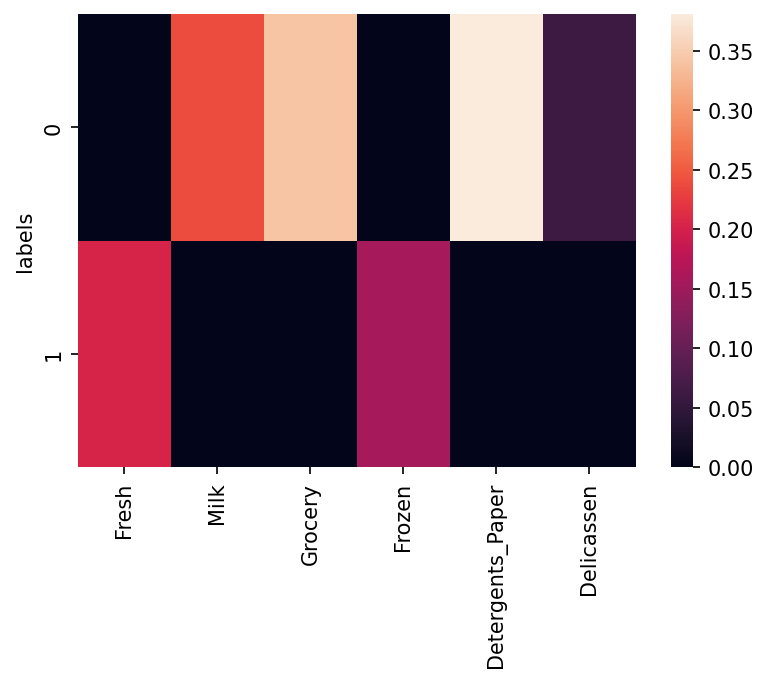

In [51]:
plt.figure(dpi=150)
sns.heatmap(data=scaled_means.iloc[[1,2]])

-------------------